# Laboratorium 2 
Wojciech Kłyszejko i Jan Stobnicki

Ćwiczenie nr 2 - Eliminacja Gaussa "wierszowa"

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


def load_matrix(file_path):
    with open(file_path, "r") as file:
        return np.loadtxt(file, delimiter=",")
    
def enlarge_matrix(m, q):
    size = len(m) * q
    res = np.zeros([size, size])
    for i in range(size):
        for j in range(size):
            res[i, j] = m[i % len(m), j % len(m)]
    return res

def draw_nonzero_values(m):
    figure(figsize=(15, 9), dpi=80)
    plt.spy(m)
    plt.show()

Nasza implementacja procedury Shur_Complement() z wykorzystaniem "wierszowej" eliminacji Gaussa. 

In [39]:
def shur_complement(A, n, m):
    iterations = n - m
    for k in range(iterations):
        Akk = A[k, k]
        A[k, k:n] = A[k, k:n] / Akk
        for j in range(k+1, n):
            A[j, k+1:n] -= A[k, k+1:n] * A[j, k]

Funkcje obliczające czas trwania procedury oraz rysujące wykresy.

In [42]:
from time import time

def timetest(A, n, m):
    start_time = time()
    shur_complement(A, n, m)
    return time() - start_time

def plot_timetest_results(matrices_sizes, time_taken, title):
    figure(figsize=(10, 6), dpi=80)
    x_coords = [i for i in range(len(matrices_sizes))]
    
    plt.scatter(x_coords, time_taken, color='red')
    
    plt.title(title)
    plt.xlabel("Matrix size")
    plt.ylabel("Time [seconds]")
    plt.xticks(x_coords, matrices_sizes)

    plt.show()
    
def calculate_times(A, matrix_scales, schur_sizes):
    for schur_size in schur_sizes:
        times = []
        sizes = []
        for s in scales:
            M = enlarge_matrix(A, s)
            n = len(M)
            times.append(timetest(M, n, n // schur_size))
            sizes.append(n)
        plot_timetest_results(sizes, times, f"Czas obliczeń dopełnienia Schura o rozmiarze: {n // schur_size}")

Pierwszą testowaną przez nas macierzą jest macierz IGA z parametrem nxx = 12.

<ipython-input-39-f897d774645c>:5: RuntimeWarning: invalid value encountered in true_divide
  A[k, k:n] = A[k, k:n] / Akk


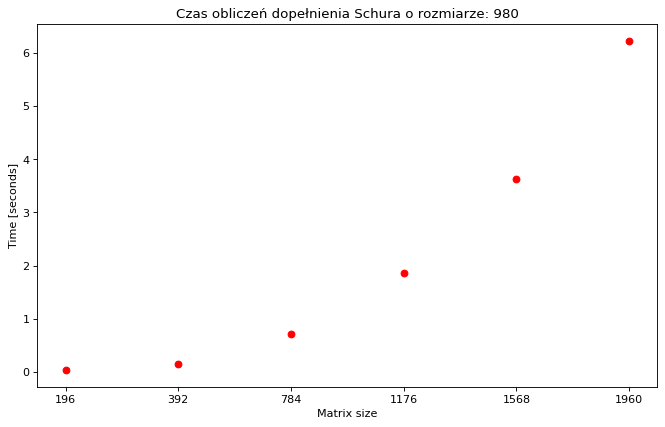

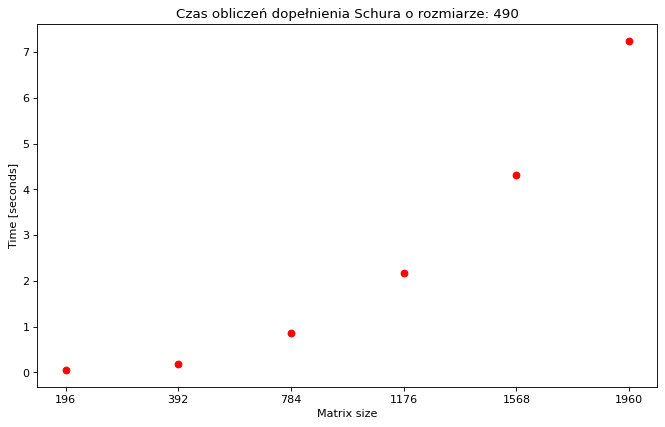

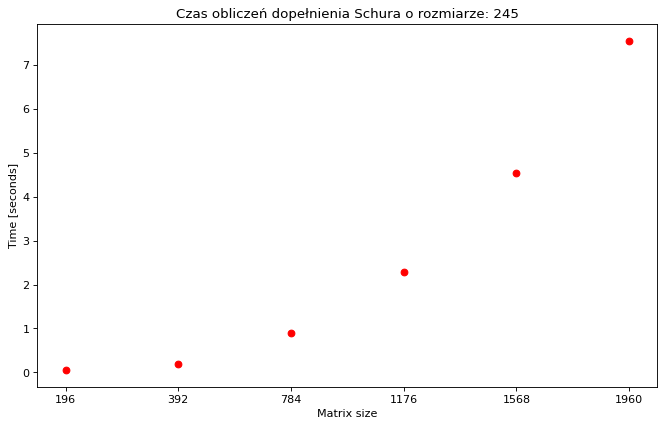

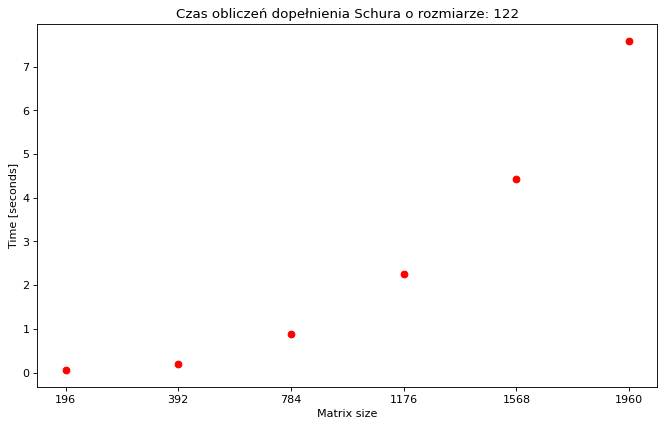

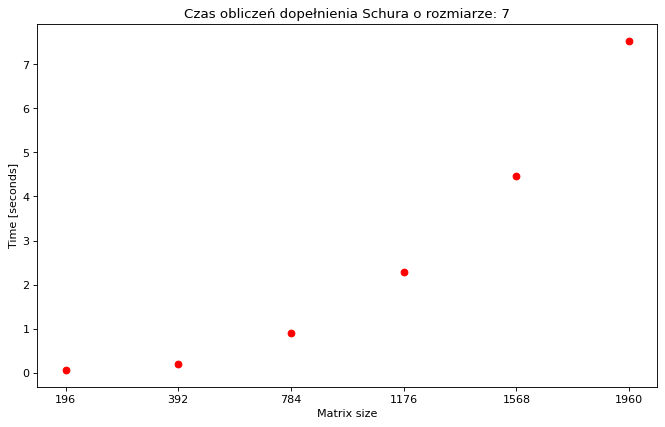

In [45]:
scales = [1, 2, 4, 6, 8, 10]
schur_sizes = [2, 4, 8, 16, 256]

calculate_times(load_matrix("matrices/iga_12.csv"), scales, schur_sizes)

Drugą testowaną przez nas macierzą jest macierz FEM z parametrem nxx = 9.

<ipython-input-39-f897d774645c>:5: RuntimeWarning: invalid value encountered in true_divide
  A[k, k:n] = A[k, k:n] / Akk


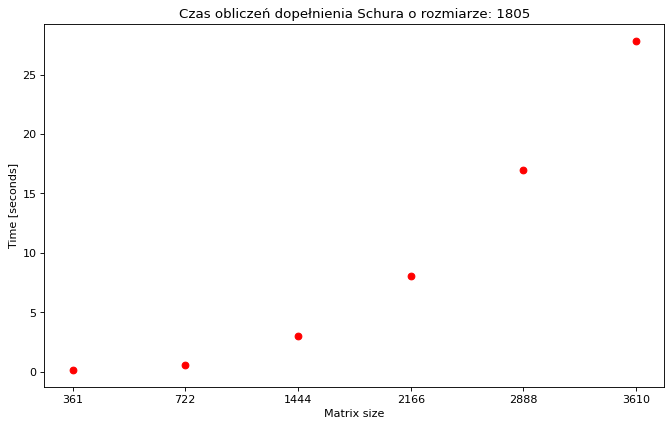

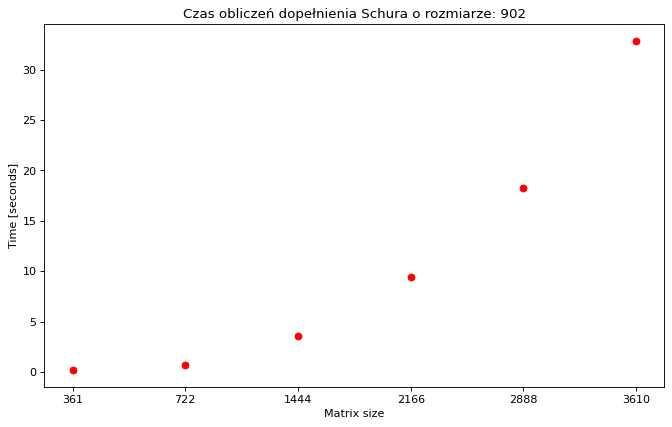

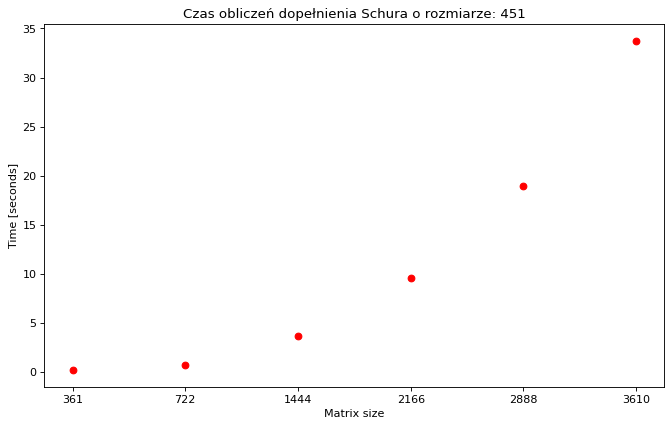

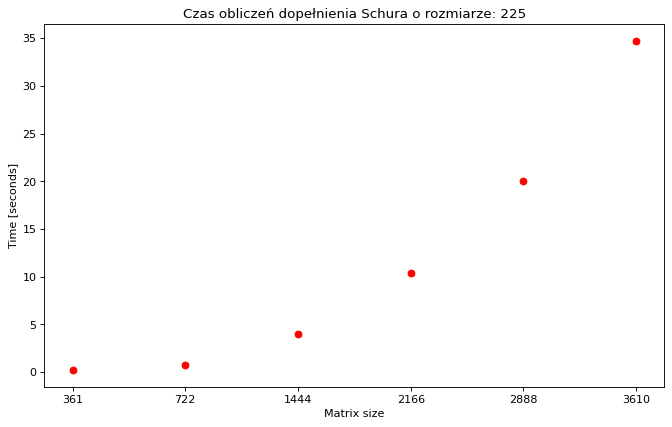

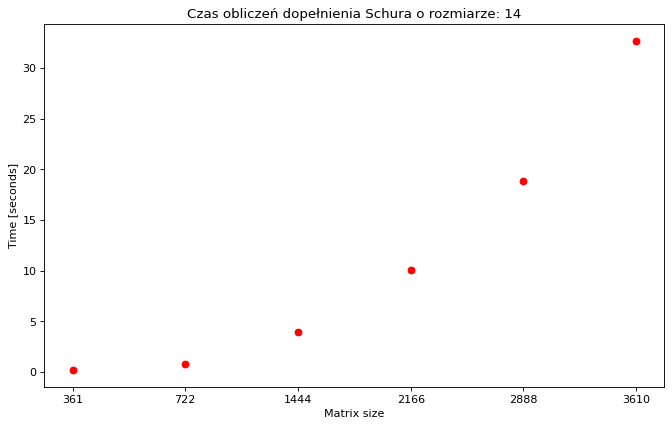

In [46]:
calculate_times(load_matrix("matrices/fem_9.csv"), scales, schur_sizes)

## 3. Jaki jest koszt obliczeniowy i pamięciowy (flopsy i memopsy) zaimplementowanego algorytmu?

### a) Koszt obliczeniowy funkcji shur_complement





Zbadaliśmy po kolei liczbę iteracji pętli oraz operacji zmiennoprzecinkowych:

Pierwsza pętla for iteruje:

od $ k = 0 $ do $ k = n - m - 1 $

Operacja dzielenia $ A[k, k:n] = A[k, k:n] / Akk $

$ n - 1 - k $

Druga pętla for iteruje:

od $ j = k + 1 $ do $ j = n - k $

Operacje dzielenia i odejmowania $ A[j, k+1:n] $ -= $ A[k, k+1:n] * A[j, k] $ 

$ 2 \cdot ( n - (k + 1) - 1) = 2 \cdot (n - k) $

Czyli mamy:

$ \sum_{k=0}^{n - m - 1} {(n - k - 1 + \sum_{j=k+1}^{n - 1}{2 \cdot (n - k)}) } $

Co daje nam wynik:

$ 1/2 (n - m) (2 m^2 + 3 m + 2 n^2 - n - 1) $ 

### b) Koszt pamięciowy funkcji shur_complement

Postępowaliśmy analogicznie, jak w przypadku poprzednim

Pierwsza pętla for iteruje:

od $ k = 0 $ do $ k = n - m - 1 $

Przypisanie $ Akk = A[k, k] $ 

$ 1 $

Operacja dzielenia $ A[k, k:n] = A[k, k:n] / Akk $

$ n - 1 - k $

Druga pętla for iteruje:

od $ j = k + 1 $ do $ j = n - k $

Operacje dzielenia i odejmowania $ A[j, k+1:n] $ -= $ A[k, k+1:n] * A[j, k] $ 

$ 2 \cdot ( n - (k + 1) - 1) + 1 = 2n - 2k + 1 $

Czyli mamy:

$ \sum_{k=0}^{n - m - 1} {(n - k + \sum_{j=k+1}^{n - 1}{2n -2k + 1}) } $

Co daje nam wynik:

$  (n - m) [(n+1)^2 + (m+2)^2 - 1] $ 

